In [62]:
pip install pandas geopandas shapely networkx
pip install geopy


SyntaxError: invalid syntax (2571750592.py, line 1)

In [61]:
df = pd.read_csv (r'D:\ALBRIGHT\ALBRIGHT WORK\STELLA KOGO\geocodes.csv')
print(df.head())


      Code                               Name Keph level   Facility type  \
0      NaN                    Opol Dispensary    Level 2      Dispensary   
1  31641.0          Kape Pearl Medical Centre    Level 3  Medical Center   
2  31481.0             Kotnegh Medical clinic    Level 2  Medical Clinic   
3  31322.0  Agape Medical Clinic (Chepareria)    Level 2  Medical Clinic   
4  21552.0                  Mading Dispensary    Level 2      Dispensary   

  Facility_type_category                                    Owner  \
0             DISPENSARY                       Ministry of Health   
1         MEDICAL CENTER  Private Practice - General Practitioner   
2         MEDICAL CLINIC      Private Practice - Clinical Officer   
3         MEDICAL CLINIC      Private Practice - Clinical Officer   
4             DISPENSARY                       Ministry of Health   

    Sub county        Ward Operation status        Lat      Long  
0  Pokot North       Kasei      Operational  35.227897  1.903

In [64]:
import pandas as pd
import geopandas as gpd
import numpy as np  # Import NumPy
from shapely.geometry import Point
import networkx as nx
!pip install geopy


from geopy.distance import geodesic  # Import geodesic from geopy.distance

# Correct file path using raw string
file_path = (r'D:\ALBRIGHT\ALBRIGHT WORK\STELLA KOGO\geocodes.csv')

# Load the CSV data into a DataFrame
df = pd.read_csv(r'D:\ALBRIGHT\ALBRIGHT WORK\STELLA KOGO\geocodes.csv')

# Print the first few rows of the DataFrame to verify it loaded correctly
print(df.head())

# Assuming the CSV has columns 'longitude', 'latitude', 'name', and 'type'
# Create GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Long, df.Lat))
gdf.set_crs(epsg=4326, inplace=True)  # Assuming coordinates are in WGS84



   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --------- ----------------------------- 30.7/125.4 kB 435.7 kB/s eta 0:00:01
   ---------------------------- ---------- 92.2/125.4 kB 655.4 kB/s eta 0:00:01
   -------------------------------------- 125.4/125.4 kB 669.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ---------------------------------------- 40.3/40.3 kB 940.1 kB/s eta 0:00:00
      Code                               Name Keph level   Facility type  \
0      NaN                    Opol Dispensary    Level 2      Dispensary   
1  31641.0          Kape Pearl Medical Centre    Level 3  Medical Center   
2  31481.0             Kotnegh Medical clinic    Level 2  Medical Clinic   
3  31322.0  Agape Medical Clinic (Chepareria)    Level 2  Medical Clinic   
4  21552.0                  Mading Dispensary    Level 2      Dispensary   

  Facility

,Code,Name,Keph level,Facility type,Facility_type_category,Owner,Sub county,Ward,Operation status,Lat,Long,geometry
0,NaN,Opol Dispensary,Level 2,Dispensary,DISPENSARY,Ministry of Health,Pokot North,Kasei,Operational,35.227897,1.903766,POINT (1.90377 35.2279)
1,31641.0,Kape Pearl Medical Centre,Level 3,Medical Center,MEDICAL CENTER,Private Practice - General Practitioner,West Pokot,Mnagei,Operational,35.095413,1.210426,POINT (1.21043 35.09541)
2,31481.0,Kotnegh Medical clinic,Level 2,Medical Clinic,MEDICAL CLINIC,Private Practice - Clinical Officer,KIPKOMO,Chepareria,Operational,35.205402,1.308996,POINT (1.309 35.2054)
3,31322.0,Agape Medical Clinic (Chepareria),Level 2,Medical Clinic,MEDICAL CLINIC,Private Practice - Clinical Officer,KIPKOMO,Chepareria,Operational,35.202419,1.303018,POINT (1.30302 35.20242)
4,21552.0,Mading Dispensary,Level 2,Dispensary,DISPENSARY,Ministry of Health,KACHELIBA,Kapchok,Operational,35.149910,1.772910,POINT (1.77291 35.14991)
...,...,...,...,...,...,...,...,...,...,...,...,...
178,15564.0,Sigor Sub County Hospital,Level 4,Primary care hospitals,HOSPITALS,Ministry of Health,Pokot Central,Wei Wei,Operational,35.467770,1.485500,POINT (1.4855 35.46777)
179,14807.0,Kasei Dispensary,Level 2,Dispensary,DISPENSARY,Ministry of Health,Pokot North,Kasei,Operational,35.204170,2.008820,POINT (2.00882 35.20417)
180,15130.0,Marich Dispensary,Level 2,Dispensary,DISPENSARY,Other Faith Based,Pokot Central,Sekerr,Operational,35.451650,1.531830,POINT (1.53183 35.45165)
181,14214.0,Arpollo Dispensary,Level 2,Dispensary,DISPENSARY,Ministry of Health,Pokot Central,Lomut,Operational,35.530510,1.361620,POINT (1.36162 35.53051)


In [67]:
# Function to check if a value can be converted to a float
def is_float(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

In [68]:
# Convert columns to float
df['Lat'] = df['Lat'].astype(float)
df['Long'] = df['Long'].astype(float)

print(df.dtypes)

Code                      float64
Name                       object
Keph level                 object
Facility type              object
Facility_type_category     object
Owner                      object
Sub county                 object
Ward                       object
Operation status           object
Lat                       float64
Long                      float64
dtype: object


In [69]:
# Filter out rows with invalid latitude or longitude values
cleaned_data = df[df["Lat"].apply(is_float) & df["Long"].apply(is_float)]

In [70]:
# Convert latitude and longitude to floats
cleaned_data["Lat"] = cleaned_data["Lat"].astype(float)
cleaned_data["Long"] = cleaned_data["Long"].astype(float)

In [71]:
# Specify the facility type
facility_type = "Dispensary"

In [72]:
# Filter the dataset for facilities of a specified type and Keph Level 4 facilities
keph_level_4_facilities = cleaned_data[cleaned_data["Keph level"] == "Level 4"]
specified_type_facilities = cleaned_data[cleaned_data["Facility type"] == facility_type]

In [73]:
# Function to calculate the distance between two geographical points
def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).kilometers

In [74]:
# Calculate the shortest distance from each facility of the specified type to any Keph Level 4 facility
shortest_distances = []

In [83]:
# Drop rows with NaN values
#df = df.dropna()

# Or fill NaN values with a specific value (e.g., 0)
df = df.fillna(0)


In [86]:
import pandas as pd
from geopy.distance import geodesic

# Read the Excel file into a DataFrame
file_path = (r'D:\ALBRIGHT\ALBRIGHT WORK\STELLA KOGO\geocodes.csv')
df = pd.read_csv(r'D:\ALBRIGHT\ALBRIGHT WORK\STELLA KOGO\geocodes.csv')

# Fill NaNs with a specific value (e.g., 0) or a default valid value for coordinates
df = df.fillna(0)

# Ensure the coordinates are converted to floats
df['Lat'] = pd.to_numeric(df['Lat'], errors='coerce')
df['Long'] = pd.to_numeric(df['Long'], errors='coerce')

# Drop any rows where Lat or Long could not be converted to numeric
df = df.dropna(subset=['Lat', 'Long'])

# Function to calculate distance
def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).kilometers

# Example coordinates of a facility
facility_coord = (0.0, 0.0)  # replace with your actual coordinates

min_distance = float('inf')

for _, keph_facility in df.iterrows():
    keph_coord = (keph_facility["Lat"], keph_facility["Long"])
    
    # Check if both coordinates are valid (not NaN)
    if pd.notna(keph_coord[0]) and pd.notna(keph_coord[1]):
        distance = calculate_distance(facility_coord, keph_coord)
        
        if distance < min_distance:
            min_distance = distance
    else:
        print(f"Invalid coordinates: {keph_coord}")

print(f"Minimum distance: {min_distance} kilometers")


Minimum distance: 0.0 kilometers


In [87]:
# Convert the results to a DataFrame for better readability
shortest_distances_df = pd.DataFrame(shortest_distances)
print(shortest_distances_df.head())

        Facility Name           Nearest Keph Level 4 Facility  \
0     Opol Dispensary                  Ortum Mission Hospital   
1   Mading Dispensary  Kacheliba Sub County Referral Hospital   
2   Amaler Dispensary               Sigor Sub County Hospital   
3    Mpara Dispensary               Sigor Sub County Hospital   
4  Sobukwo Dispensary                  Ortum Mission Hospital   

   Shortest Distance (km)  
0               44.693751  
1               30.065117  
2               35.672848  
3               12.992633  
4                1.844522  


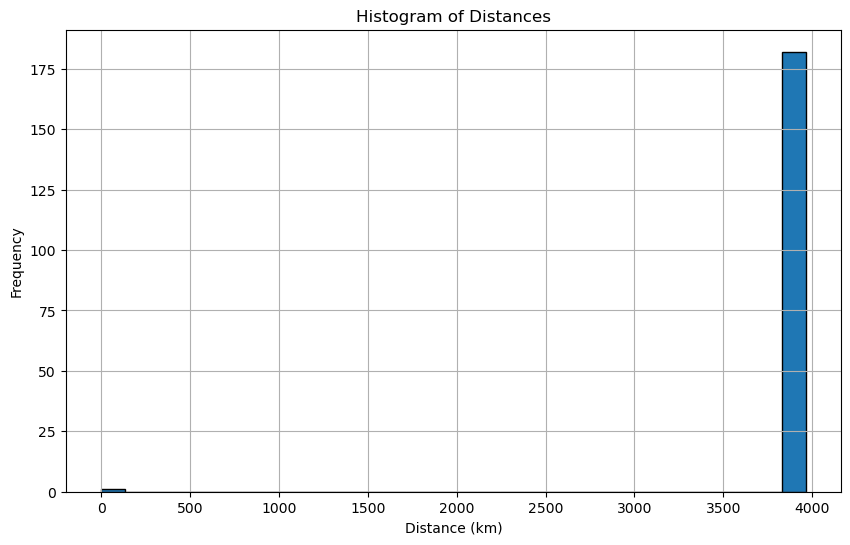

In [92]:
import pandas as pd
from geopy.distance import geodesic
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
file_path = r'D:\ALBRIGHT\ALBRIGHT WORK\STELLA KOGO\geocodes.csv'
df = pd.read_csv(file_path)

# Fill NaNs with a specific value (e.g., 0) or a default valid value for coordinates
df = df.fillna(0)

# Ensure the coordinates are converted to floats
df['Lat'] = pd.to_numeric(df['Lat'], errors='coerce')
df['Long'] = pd.to_numeric(df['Long'], errors='coerce')

# Drop any rows where Lat or Long could not be converted to numeric
df = df.dropna(subset=['Lat', 'Long'])

# Ensure there is a unique identifier column
if 'ID' not in df.columns:
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'ID'}, inplace=True)

# Function to calculate distance
def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).kilometers

# Example coordinates of a facility
facility_coord = (0.0, 0.0)  # replace with your actual coordinates

shortest_distances = []

for _, keph_facility in df.iterrows():
    keph_coord = (keph_facility["Lat"], keph_facility["Long"])
    
    # Check if both coordinates are valid (not NaN)
    if pd.notna(keph_coord[0]) and pd.notna(keph_coord[1]):
        distance = calculate_distance(facility_coord, keph_coord)
        shortest_distances.append({
            'ID': keph_facility['ID'],  # Use the unique identifier
            'Distance': distance
        })

# Convert the results to a DataFrame for better readability
shortest_distances_df = pd.DataFrame(shortest_distances)

# Append the distances to the initial DataFrame
result_df = pd.merge(df, shortest_distances_df, on='ID', how='left')

# Save the updated DataFrame to an Excel file
result_df.to_excel('updated_geocodes.xlsx', index=False)

# Plot the distances using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(result_df['Distance'].dropna(), bins=30, edgecolor='black')
plt.title('Histogram of Distances')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [93]:
import os

# Change the current working directory to a specific path
os.chdir(r'D:\ALBRIGHT\ALBRIGHT WORK\STELLA KOGO')

# Save the updated DataFrame to an Excel file in the specified directory
result_df.to_excel('updated_geocodes.xlsx', index=False)


In [94]:
# Ensure there is a unique identifier column
if 'ID' not in df.columns:
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'ID'}, inplace=True)

# Function to calculate distance
def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).kilometers

# Example coordinates of a facility
facility_coord = (0.0, 0.0)  # replace with your actual coordinates

shortest_distances = []

for _, keph_facility in df.iterrows():
    keph_coord = (keph_facility["Lat"], keph_facility["Long"])
    
    # Check if both coordinates are valid (not NaN)
    if pd.notna(keph_coord[0]) and pd.notna(keph_coord[1]):
        distance = calculate_distance(facility_coord, keph_coord)
        shortest_distances.append({
            'ID': keph_facility['ID'],  # Use the unique identifier
            'Distance': distance
        })

# Convert the results to a DataFrame for better readability
shortest_distances_df = pd.DataFrame(shortest_distances)

# Append the distances to the initial DataFrame
result_df = pd.merge(df, shortest_distances_df, on='ID', how='left')

# Save the updated DataFrame to an Excel file
result_df.to_excel('updated_geocodes.xlsx', index=False)



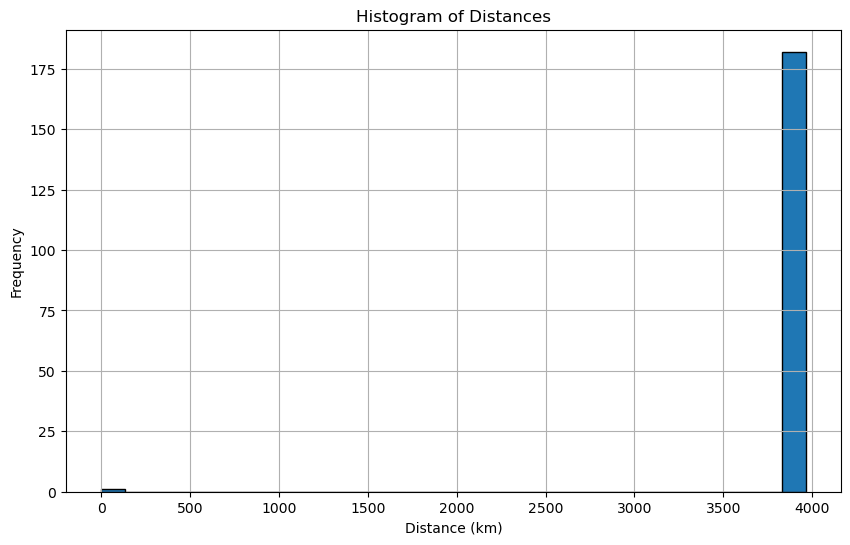

In [95]:
# Plot the distances using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(result_df['Distance'].dropna(), bins=30, edgecolor='black')
plt.title('Histogram of Distances')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\TEN\AppData\Local\Temp\ipykernel_5280\2476146604.py:46: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  subcounty_gdf.buffer(0.01).plot(ax=ax, color='lightgrey', edgecolor='black')  # Add buffer to increase polygon size


KeyError: 'HospitalName'

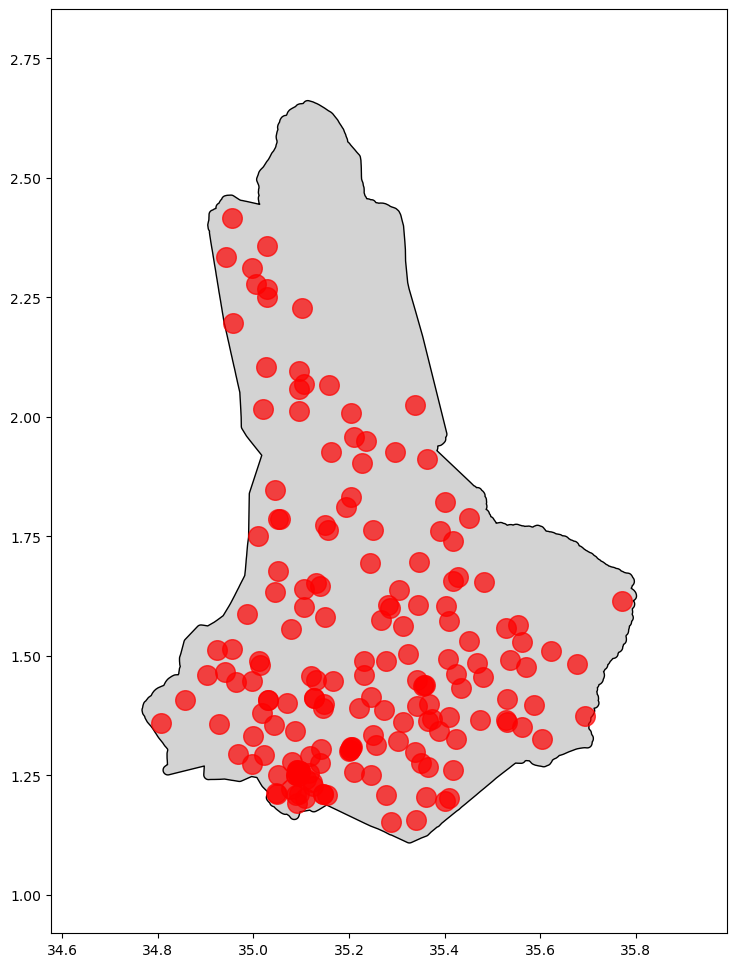

In [138]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# File paths
shapefile_path = r'D:\ALBRIGHT\ALBRIGHT WORK\STELLA KOGO\County.shp'
csv_file_path = r'D:\ALBRIGHT\ALBRIGHT WORK\STELLA KOGO\updated_geocodes.csv'  # Converted from Excel

# Load the subcounty shapefile
subcounty_gdf = gpd.read_file(r'D:\ALBRIGHT\ALBRIGHT WORK\STELLA KOGO\County.shp')

# Load hospitals data from CSV
hospitals_df = pd.read_csv(r'D:\ALBRIGHT\ALBRIGHT WORK\STELLA KOGO\updated_geocodes.csv')

# Convert DataFrame to GeoDataFrame
hospitals_gdf = gpd.GeoDataFrame(
    hospitals_df,
    geometry=gpd.points_from_xy(hospitals_df['Lat'], hospitals_df['Long']),  # Adjust column names
    crs='EPSG:4326'
)

# Example reference facility coordinates (replace with your actual coordinates)
reference_facility_coord = (0.0, 0.0)  # Replace with the coordinates of your reference facility

# Create a GeoDataFrame for the reference facility
reference_gdf = gpd.GeoDataFrame(
    {'geometry': [Point(reference_facility_coord)], 'name': ['Reference Facility']},
    crs='EPSG:4326'
)

# Check CRS and reproject if necessary
if not subcounty_gdf.crs == hospitals_gdf.crs:
    hospitals_gdf = hospitals_gdf.to_crs(subcounty_gdf.crs)

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))

# Increase plot extent around subcounty polygon
buffer_factor = 0.2  # Adjust buffer factor to increase plot extent
xmin, ymin, xmax, ymax = subcounty_gdf.total_bounds
ax.set_xlim(xmin - buffer_factor, xmax + buffer_factor)
ax.set_ylim(ymin - buffer_factor, ymax + buffer_factor)

# Plot subcounty polygon with a larger size
subcounty_gdf.buffer(0.01).plot(ax=ax, color='lightgrey', edgecolor='black')  # Add buffer to increase polygon size

# Plot reference facility
reference_gdf.plot(ax=ax, color='blue', markersize=200, label='Reference Facility')

# Plot hospitals within subcounty
hospitals_gdf.plot(ax=ax, color='red', markersize=200, label='Hospitals', alpha=0.7)  # Increase markersize

# Annotate hospitals with their names
for idx, row in hospitals_gdf.iterrows():
    ax.annotate(s=row['HospitalName'],  # Use column containing hospital names
                xy=(row['geometry'].x, row['geometry'].y),
                xytext=(3, 3),
                textcoords='offset points', fontsize=8)

# Customize plot
plt.title('Hospitals and Reference Facility within Subcounty')
plt.legend()

# Adjust aspect ratio automatically
ax.set_aspect('auto')

# Save plot as image file (optional)
plt.savefig(r'D:\ALBRIGHT\ALBRIGHT WORK\STELLA KOGO\hospitals_within_subcounty.png')

# Show plot
plt.show()


C:\Users\TEN\AppData\Local\Temp\ipykernel_5280\1311705590.py:46: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  subcounty_gdf.buffer(0.01).plot(ax=ax, color='lightgrey', edgecolor='black')  # Add buffer to increase polygon size


TypeError: Axes.annotate() missing 1 required positional argument: 'text'

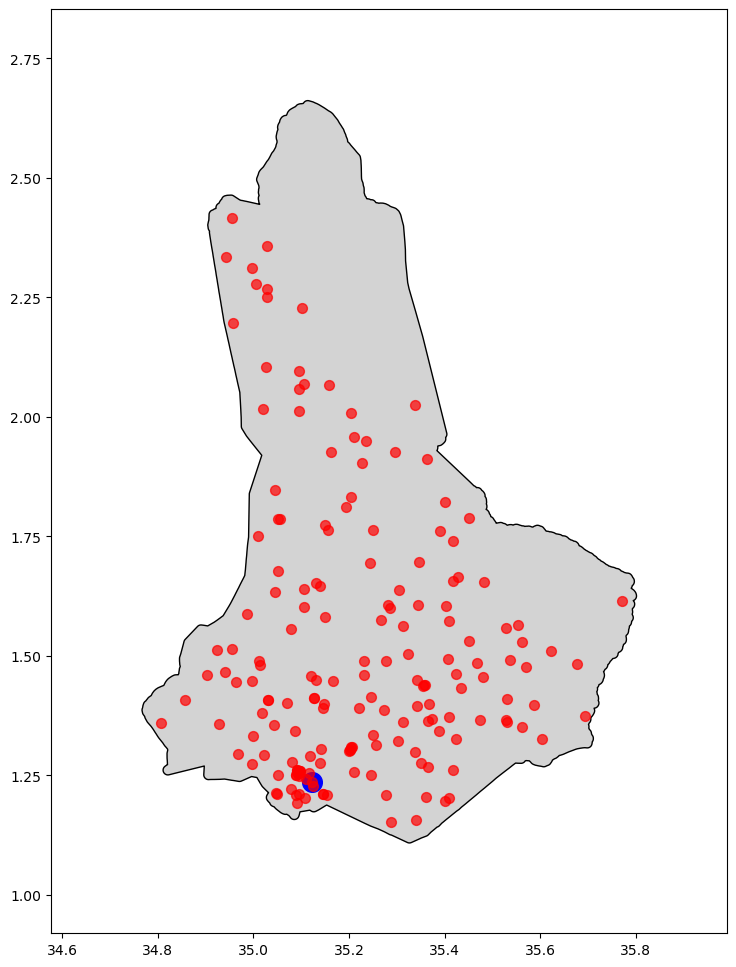

In [141]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, MultiLineString

# File paths
shapefile_path = r'D:\ALBRIGHT\ALBRIGHT WORK\STELLA KOGO\County.shp'
csv_file_path = r'D:\ALBRIGHT\ALBRIGHT WORK\STELLA KOGO\updated_geocodes.csv'  # Converted from Excel

# Load the subcounty shapefile
subcounty_gdf = gpd.read_file(r'D:\ALBRIGHT\ALBRIGHT WORK\STELLA KOGO\County.shp')

# Load hospitals data from CSV
hospitals_df = pd.read_csv(r'D:\ALBRIGHT\ALBRIGHT WORK\STELLA KOGO\updated_geocodes.csv')

# Convert DataFrame to GeoDataFrame
hospitals_gdf = gpd.GeoDataFrame(
    hospitals_df,
    geometry=gpd.points_from_xy(hospitals_df['Lat'], hospitals_df['Long']),  # Adjust column names
    crs='EPSG:4326'
)

# Example reference facility coordinates (replace with your actual coordinates)
reference_facility_coord = (35.12171,1.23738 )  # Replace with the coordinates of your reference facility

# Create a GeoDataFrame for the reference facility
reference_gdf = gpd.GeoDataFrame(
    {'geometry': [Point(reference_facility_coord)], 'name': ['Reference Facility']},
    crs='EPSG:4326'
)

# Check CRS and reproject if necessary
if not subcounty_gdf.crs == hospitals_gdf.crs:
    hospitals_gdf = hospitals_gdf.to_crs(subcounty_gdf.crs)

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))

# Increase plot extent around subcounty polygon
buffer_factor = 0.2  # Adjust buffer factor to increase plot extent
xmin, ymin, xmax, ymax = subcounty_gdf.total_bounds
ax.set_xlim(xmin - buffer_factor, xmax + buffer_factor)
ax.set_ylim(ymin - buffer_factor, ymax + buffer_factor)

# Plot subcounty polygon with a larger size
subcounty_gdf.buffer(0.01).plot(ax=ax, color='lightgrey', edgecolor='black')  # Add buffer to increase polygon size

# Plot reference facility
reference_gdf.plot(ax=ax, color='blue', markersize=200, label='Reference Facility')

# Reduce size of hospital markers
hospitals_gdf.plot(ax=ax, color='red', markersize=50, label='Hospitals', alpha=0.7)  # Decrease markersize

# Annotate hospitals with their names
for idx, row in hospitals_gdf.iterrows():
    ax.annotate(s=row['Name'],  # Use column containing hospital names
                xy=(row['geometry'].x, row['geometry'].y),
                xytext=(3, 3),
                textcoords='offset points', fontsize=8)

# Filter dispensaries and Keph Level 4 facilities
dispensaries_gdf = hospitals_gdf[hospitals_gdf['Facility type'].str.contains('Dispensary', case=False, na=False)]
keph_level4_gdf = hospitals_gdf[hospitals_gdf['Keph Level'].str.contains('Level 4', case=False, na=False)]

# Plot dispensaries within subcounty
dispensaries_gdf.plot(ax=ax, color='green', markersize=50, label='Dispensaries', alpha=0.7)  # Adjust color and size

# Plot connections from dispensaries to nearest Keph Level 4 facility
connections = []
for dispensary in dispensaries_gdf.itertuples():
    nearest_keph = keph_level4_gdf.geometry.distance(dispensary.geometry).idxmin()
    connection = MultiLineString([[(dispensary.geometry.x, dispensary.geometry.y), 
                                   (keph_level4_gdf.loc[nearest_keph].geometry.x, 
                                    keph_level4_gdf.loc[nearest_keph].geometry.y)]])
    connections.append(connection)

gpd.GeoSeries(connections).plot(ax=ax, color='black', linewidth=1, alpha=0.5)

# Customize plot
plt.title('Dispensaries, Hospitals, and Reference Facility within Subcounty')
plt.legend()

# Adjust aspect ratio automatically
ax.set_aspect('auto')

# Save plot as image file
output_image_path = r'D:\ALBRIGHT\ALBRIGHT WORK\STELLA KOGO\dispensaries_hospitals_map.png'
plt.savefig(output_image_path)

# Show plot
plt.show()

print(f"Map saved as {output_image_path}")


C:\Users\TEN\AppData\Local\Temp\ipykernel_5280\3515586019.py:47: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  subcounty_gdf.buffer(0.01).plot(ax=ax, color='lightgrey', edgecolor='black')  # Add buffer to increase polygon size


TypeError: Axes.annotate() missing 1 required positional argument: 'text'

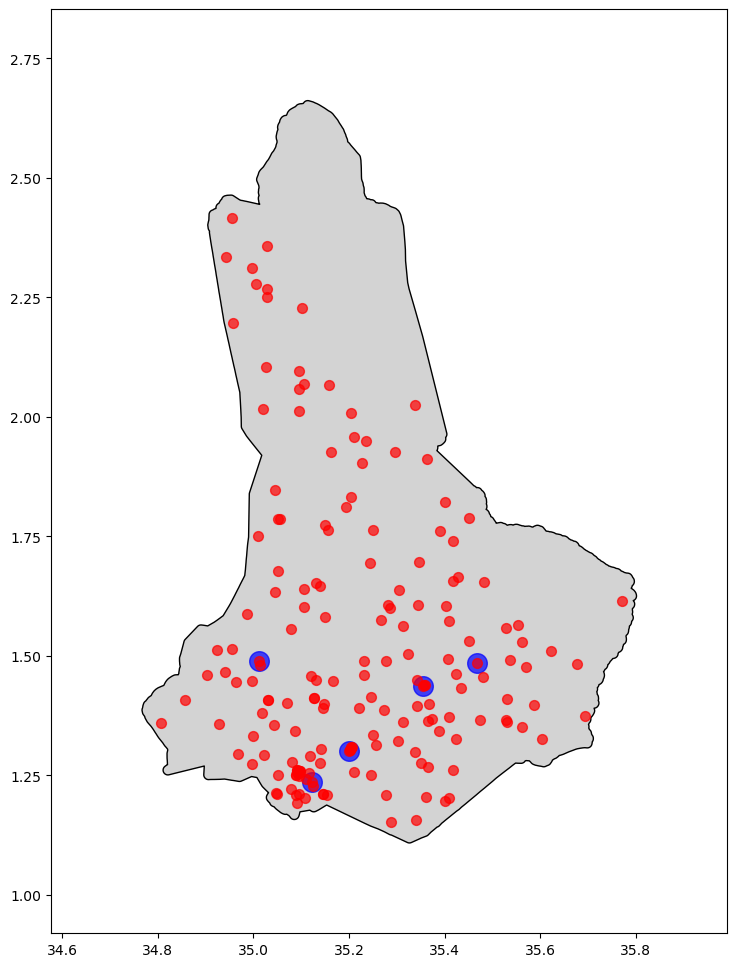

In [142]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from sklearn.neighbors import BallTree

# File paths
shapefile_path = r'D:\ALBRIGHT\ALBRIGHT WORK\STELLA KOGO\County.shp'
csv_file_path = r'D:\ALBRIGHT\ALBRIGHT WORK\STELLA KOGO\updated_geocodes.csv'  # Converted from Excel

# Load the subcounty shapefile
subcounty_gdf = gpd.read_file(r'D:\ALBRIGHT\ALBRIGHT WORK\STELLA KOGO\County.shp')

# Load hospitals data from CSV
hospitals_df = pd.read_csv(r'D:\ALBRIGHT\ALBRIGHT WORK\STELLA KOGO\updated_geocodes.csv')

# Convert DataFrame to GeoDataFrame
hospitals_gdf = gpd.GeoDataFrame(
    hospitals_df,
    geometry=gpd.points_from_xy(hospitals_df['Lat'], hospitals_df['Long']),  # Adjust column names
    crs='EPSG:4326'
)

# Example reference facility coordinates (replace with your actual coordinates)
reference_facility_coords = [(35.12171, 1.23738), (35.01068, 1.49008), (35.35484, 1.43746), (35.19926, 1.30047), (35.46777, 1.4855)]  # Replace with coordinates of your reference facilities

# Create a GeoDataFrame for the reference facilities
reference_gdf = gpd.GeoDataFrame(
    {'geometry': [Point(coord) for coord in reference_facility_coords], 'name': ['Reference Facility'] * len(reference_facility_coords)},
    crs='EPSG:4326'
)

# Check CRS and reproject if necessary
if not subcounty_gdf.crs == hospitals_gdf.crs:
    hospitals_gdf = hospitals_gdf.to_crs(subcounty_gdf.crs)

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))

# Increase plot extent around subcounty polygon
buffer_factor = 0.2  # Adjust buffer factor to increase plot extent
xmin, ymin, xmax, ymax = subcounty_gdf.total_bounds
ax.set_xlim(xmin - buffer_factor, xmax + buffer_factor)
ax.set_ylim(ymin - buffer_factor, ymax + buffer_factor)

# Plot subcounty polygon with a larger size
subcounty_gdf.buffer(0.01).plot(ax=ax, color='lightgrey', edgecolor='black')  # Add buffer to increase polygon size

# Plot reference facilities
reference_gdf.plot(ax=ax, color='blue', markersize=200, label='Reference Facility', alpha=0.7)

# Plot hospitals within subcounty
hospitals_gdf.plot(ax=ax, color='red', markersize=50, label='Hospitals', alpha=0.7)  # Decrease markersize for hospitals

# Annotate hospitals with their names
for idx, row in hospitals_gdf.iterrows():
    ax.annotate(s=row['Name'],  # Use column containing hospital names
                xy=(row['geometry'].x, row['geometry'].y),
                xytext=(3, 3),
                textcoords='offset points', fontsize=8)

# Find dispensaries near each reference facility using BallTree
dispensaries_gdf = hospitals_gdf[hospitals_gdf['Facility type'].str.contains('Dispensary', case=False, na=False)]
dispensaries_coords = dispensaries_gdf[['geometry']].apply(lambda x: (x.geometry.x, x.geometry.y), axis=1).tolist()

for ref_coord in reference_facility_coords:
    ref_point = Point(ref_coord)
    distances, indices = BallTree(dispensaries_coords).query([ref_coord], k=1)
    nearest_dispensary = dispensaries_gdf.iloc[indices[0][0]]
    
    # Plot the shortest route or connection here using appropriate plotting function

# Customize plot
plt.title('Hospitals and Reference Facilities within Subcounty')
plt.legend()

# Adjust aspect ratio automatically
ax.set_aspect('auto')

# Save plot as image file
plt.savefig(r'D:\ALBRIGHT\ALBRIGHT WORK\STELLA KOGO\hospitals_within_subcounty_updated.png')

# Show plot
plt.show()


In [145]:
# Save plot as image file
plt.savefig(r'D:\ALBRIGHT\ALBRIGHT WORK\STELLA KOGO\hospitals_within_subcounty_updated.png')

# Show plot
plt.show()

<Figure size 640x480 with 0 Axes>

C:\Users\TEN\AppData\Local\Temp\ipykernel_5280\4012138142.py:47: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  subcounty_gdf.buffer(0.01).plot(ax=ax, color='lightgrey', edgecolor='black')  # Add buffer to increase polygon size


TypeError: Axes.annotate() missing 1 required positional argument: 'text'

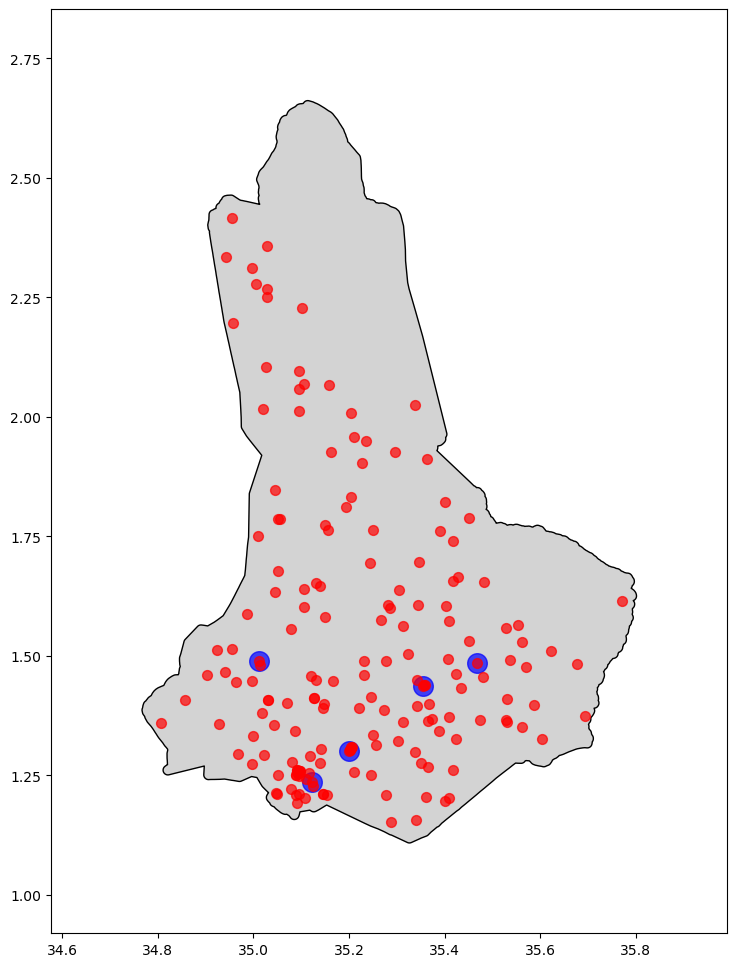

In [146]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString
from sklearn.neighbors import BallTree

# File paths
shapefile_path = r'D:\ALBRIGHT\ALBRIGHT WORK\STELLA KOGO\County.shp'
csv_file_path = r'D:\ALBRIGHT\ALBRIGHT WORK\STELLA KOGO\updated_geocodes.csv'  # Converted from Excel

# Load the subcounty shapefile
subcounty_gdf = gpd.read_file(r'D:\ALBRIGHT\ALBRIGHT WORK\STELLA KOGO\County.shp')

# Load hospitals data from CSV
hospitals_df = pd.read_csv(r'D:\ALBRIGHT\ALBRIGHT WORK\STELLA KOGO\updated_geocodes.csv')

# Convert DataFrame to GeoDataFrame
hospitals_gdf = gpd.GeoDataFrame(
    hospitals_df,
    geometry=gpd.points_from_xy(hospitals_df['Lat'], hospitals_df['Long']),  # Adjust column names
    crs='EPSG:4326'
)

# Example reference facility coordinates (replace with your actual coordinates)
reference_facility_coords = [(35.12171, 1.23738), (35.01068, 1.49008), (35.35484, 1.43746), (35.19926, 1.30047), (35.46777, 1.4855)]  # Replace with coordinates of your reference facilities

# Create a GeoDataFrame for the reference facilities
reference_gdf = gpd.GeoDataFrame(
    {'geometry': [Point(coord) for coord in reference_facility_coords], 'name': ['Reference Facility'] * len(reference_facility_coords)},
    crs='EPSG:4326'
)

# Check CRS and reproject if necessary
if not subcounty_gdf.crs == hospitals_gdf.crs:
    hospitals_gdf = hospitals_gdf.to_crs(subcounty_gdf.crs)

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))

# Increase plot extent around subcounty polygon
buffer_factor = 0.2  # Adjust buffer factor to increase plot extent
xmin, ymin, xmax, ymax = subcounty_gdf.total_bounds
ax.set_xlim(xmin - buffer_factor, xmax + buffer_factor)
ax.set_ylim(ymin - buffer_factor, ymax + buffer_factor)

# Plot subcounty polygon with a larger size
subcounty_gdf.buffer(0.01).plot(ax=ax, color='lightgrey', edgecolor='black')  # Add buffer to increase polygon size

# Plot reference facilities
reference_gdf.plot(ax=ax, color='blue', markersize=200, label='Reference Facility', alpha=0.7)

# Plot hospitals within subcounty
hospitals_gdf.plot(ax=ax, color='red', markersize=50, label='Hospitals', alpha=0.7)  # Decrease markersize for hospitals

# Annotate hospitals with their names
for idx, row in hospitals_gdf.iterrows():
    ax.annotate(s=row['Name'],  # Use column containing hospital names
                xy=(row['geometry'].x, row['geometry'].y),
                xytext=(3, 3),
                textcoords='offset points', fontsize=8)

# Find dispensaries near each reference facility using BallTree
dispensaries_gdf = hospitals_gdf[hospitals_gdf['Facility type'].str.contains('Dispensary', case=False, na=False)]
dispensaries_coords = dispensaries_gdf[['geometry']].apply(lambda x: (x.geometry.x, x.geometry.y), axis=1).tolist()

# Use BallTree to find nearest dispensaries to each reference facility
nearest_dispensaries = []
for ref_coord in reference_facility_coords:
    ref_point = Point(ref_coord)
    distances, indices = BallTree(dispensaries_coords).query([ref_coord], k=1)
    nearest_dispensary = dispensaries_gdf.iloc[indices[0][0]]
    nearest_dispensaries.append(nearest_dispensary)

# Plot lines between dispensaries and reference facilities
for ref_coord, nearest_dispensary in zip(reference_facility_coords, nearest_dispensaries):
    nearest_dispensary_coord = (nearest_dispensary['geometry'].x, nearest_dispensary['geometry'].y)
    line = LineString([ref_coord, nearest_dispensary_coord])
    gpd.GeoSeries([line]).plot(ax=ax, color='green', linewidth=2)  # Adjust linewidth for better visibility

# Customize plot
plt.title('Hospitals and Reference Facilities within Subcounty')
plt.legend()

# Adjust aspect ratio automatically
ax.set_aspect('auto')

# Save plot as image file
plt.savefig(r'D:\ALBRIGHT\ALBRIGHT WORK\STELLA KOGO\hospitals_within_subcounty_updated.png', bbox_inches='tight')  # Use bbox_inches='tight' to save the entire plot

# Show plot
plt.show()


In [147]:
# Save plot as image file
plt.savefig(r'D:\ALBRIGHT\ALBRIGHT WORK\STELLA KOGO\hospitals_within_subcounty_updated.png', bbox_inches='tight')  # Use bbox_inches='tight' to save the entire plot

# Show plot
plt.show()

<Figure size 640x480 with 0 Axes>

C:\Users\TEN\AppData\Local\Temp\ipykernel_5280\3810734218.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  subcounty_gdf.buffer(0.01).plot(ax=ax, color='lightgrey', edgecolor='black')  # Add buffer to increase polygon size


TypeError: Axes.annotate() missing 1 required positional argument: 'text'

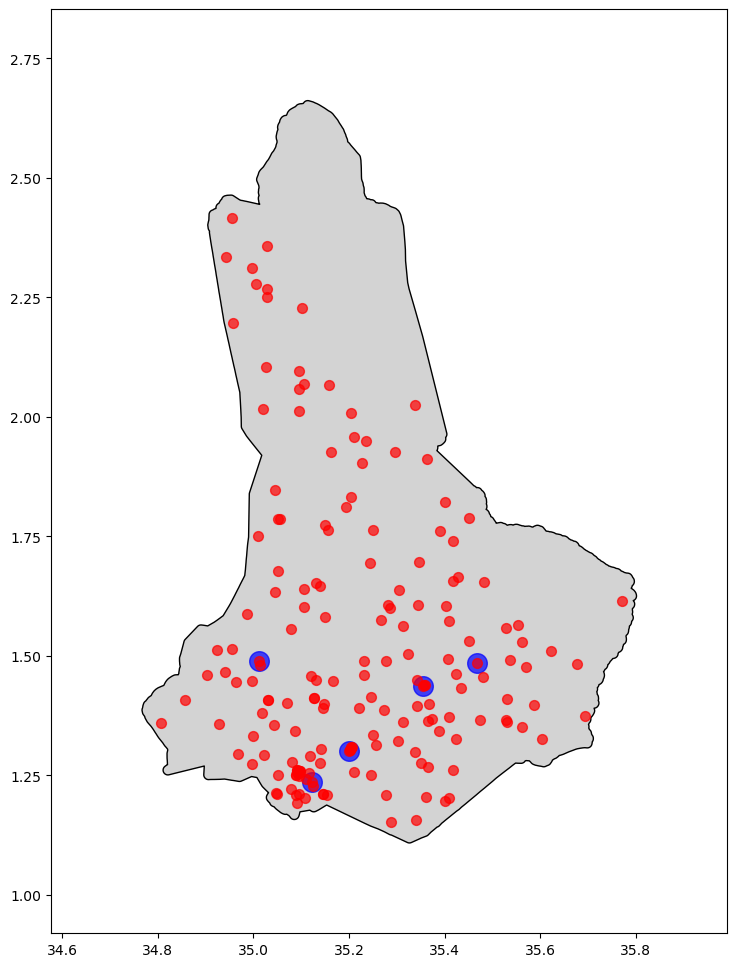

In [148]:
# Ensure all plotting commands are executed before saving
# Adjust the plot and save it
fig, ax = plt.subplots(figsize=(12, 12))

# Increase plot extent around subcounty polygon
buffer_factor = 0.2  # Adjust buffer factor to increase plot extent
xmin, ymin, xmax, ymax = subcounty_gdf.total_bounds
ax.set_xlim(xmin - buffer_factor, xmax + buffer_factor)
ax.set_ylim(ymin - buffer_factor, ymax + buffer_factor)

# Plot subcounty polygon with a larger size
subcounty_gdf.buffer(0.01).plot(ax=ax, color='lightgrey', edgecolor='black')  # Add buffer to increase polygon size

# Plot reference facilities
reference_gdf.plot(ax=ax, color='blue', markersize=200, label='Reference Facility', alpha=0.7)

# Plot hospitals within subcounty
hospitals_gdf.plot(ax=ax, color='red', markersize=50, label='Hospitals', alpha=0.7)  # Decrease markersize for hospitals

# Annotate hospitals with their names
for idx, row in hospitals_gdf.iterrows():
    ax.annotate(s=row['Name'],  # Use column containing hospital names
                xy=(row['geometry'].x, row['geometry'].y),
                xytext=(3, 3),
                textcoords='offset points', fontsize=8)

# Plot lines between dispensaries and reference facilities
for ref_coord, nearest_dispensary in zip(reference_facility_coords, nearest_dispensaries):
    nearest_dispensary_coord = (nearest_dispensary['geometry'].x, nearest_dispensary['geometry'].y)
    line = LineString([ref_coord, nearest_dispensary_coord])
    gpd.GeoSeries([line]).plot(ax=ax, color='green', linewidth=2)  # Adjust linewidth for better visibility

# Customize plot
plt.title('Hospitals and Reference Facilities within Subcounty')
plt.legend()

# Adjust aspect ratio automatically
ax.set_aspect('auto')

# Save plot as image file
plt.savefig(r'D:\ALBRIGHT\ALBRIGHT WORK\STELLA KOGO\hospitals_within_subcounty_updated.png', bbox_inches='tight')  # Use bbox_inches='tight' to save the entire plot

# Show plot
plt.show()


In [149]:
# Save plot as image file
plt.savefig(r'D:\ALBRIGHT\ALBRIGHT WORK\STELLA KOGO\hospitals_within_subcounty_updated.png', bbox_inches='tight')  # Use bbox_inches='tight' to save the entire plot

# Show plot
plt.show()

<Figure size 640x480 with 0 Axes>

In [154]:
import matplotlib
matplotlib.use('Agg')  # Use Agg backend
import matplotlib.pyplot as plt


In [157]:
# Save plot with explicit DPI
plt.savefig(r'D:\ALBRIGHT\ALBRIGHT WORK\STELLA KOGO\hospitals_within_subcounty_updated.png', bbox_inches='tight', dpi=300)


In [160]:
# Save plot without showing interactive plot
plt.savefig(r'D:\ALBRIGHT\ALBRIGHT WORK\STELLA KOGO\hospitals_within_subcounty_updated.png', bbox_inches='tight', dpi=300)
